In [28]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import os
from torchvision import transforms
from model import TransformerConfig
from PIL import Image
import matplotlib.pyplot as plt

In [39]:
transform_ds = transforms.Compose([
    transforms.Resize((
                        TransformerConfig().image_size,
                        TransformerConfig().image_size*2
                        )), # Resize the input image

    transforms.ToTensor(), # Convert to torch tensor (scales data into [0,1])
    transforms.Lambda(lambda t: (t * 2) - 1), # Scale data between [-1, 1] 
])


In [40]:
import os
from torch.utils.data import Dataset
from PIL import Image

class CarDataset(Dataset):
    def __init__(self, root_dir: str, transform=None):
        super().__init__()
        self.root_dir = root_dir
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith(('jpg', 'jpeg', 'png'))]
        self.transform = transform
    
    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")  # Open image and convert to RGB
        
        if self.transform:
            image = self.transform(image)  # Convert to Tensor
            width_half = image.shape[-1] // 2  # Get half width
            return image[:, :, :width_half], image[:, :, width_half:]  # Left and right split
        
        else:
            # For PIL Image (if no transform applied)
            width, height = image.size
            left_half = image.crop((0, 0, width // 2, height))  # Left side
            right_half = image.crop((width // 2, 0, width, height))  # Right side
            return left_half, right_half

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


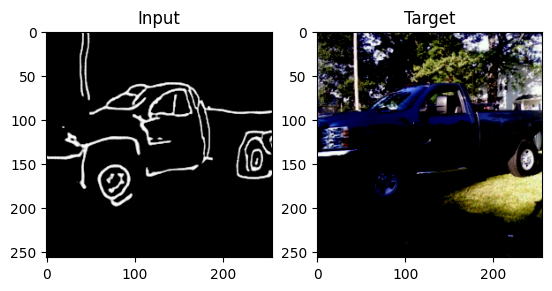

In [48]:
ds = CarDataset(root_dir="Cars", transform=transform_ds)
dl = DataLoader(ds, batch_size=1, shuffle=True)
x = next(iter(dl))

plt.aci

plt.subplot(1,2,1)
plt.title("Input")
plt.imshow(x[1][0].permute(1,2,0))

plt.subplot(1,2,2)
plt.title("Target")
plt.imshow(x[0][0].permute(1,2,0))

In [38]:
x[0].shape

torch.Size([1, 512, 1024, 1])